In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('Unemployment in India.csv')
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [7]:
df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 46.2+ KB


In [12]:
print(df.columns.tolist())


['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)', ' Estimated Employed', ' Estimated Labour Participation Rate (%)', 'Area']


In [13]:
df.columns = df.columns.str.strip()

In [14]:
df['Date']=pd.to_datetime(df['Date'])
df['Date']

C:\Users\maale\AppData\Local\Temp\ipykernel_2204\1475032039.py:1: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date']=pd.to_datetime(df['Date'])


0     2019-05-31
1     2019-06-30
2     2019-07-31
3     2019-08-31
4     2019-09-30
         ...    
749   2020-02-29
750   2020-03-31
751   2020-04-30
752   2020-05-31
753   2020-06-30
Name: Date, Length: 740, dtype: datetime64[ns]


**UNEMPLOYMENT RATE TRENDS OVER TIME**

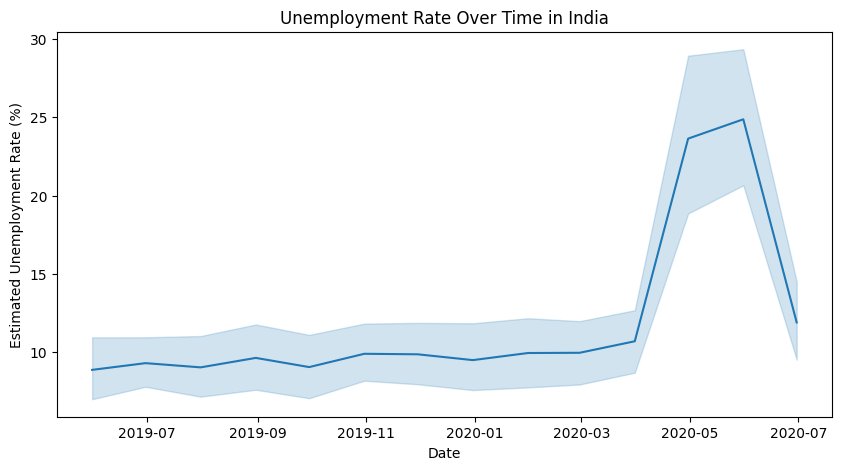

In [18]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Date', y='Estimated Unemployment Rate (%)', data=df)
plt.title('Unemployment Rate Over Time in India')
plt.show()

In [19]:
df['Date'].value_counts()

Date
2019-10-31    55
2019-11-30    55
2019-06-30    54
2019-07-31    54
2019-05-31    54
2019-08-31    53
2020-01-31    53
2019-12-31    53
2020-02-29    53
2019-09-30    52
2020-03-31    52
2020-04-30    51
2020-05-31    51
2020-06-30    50
Name: count, dtype: int64

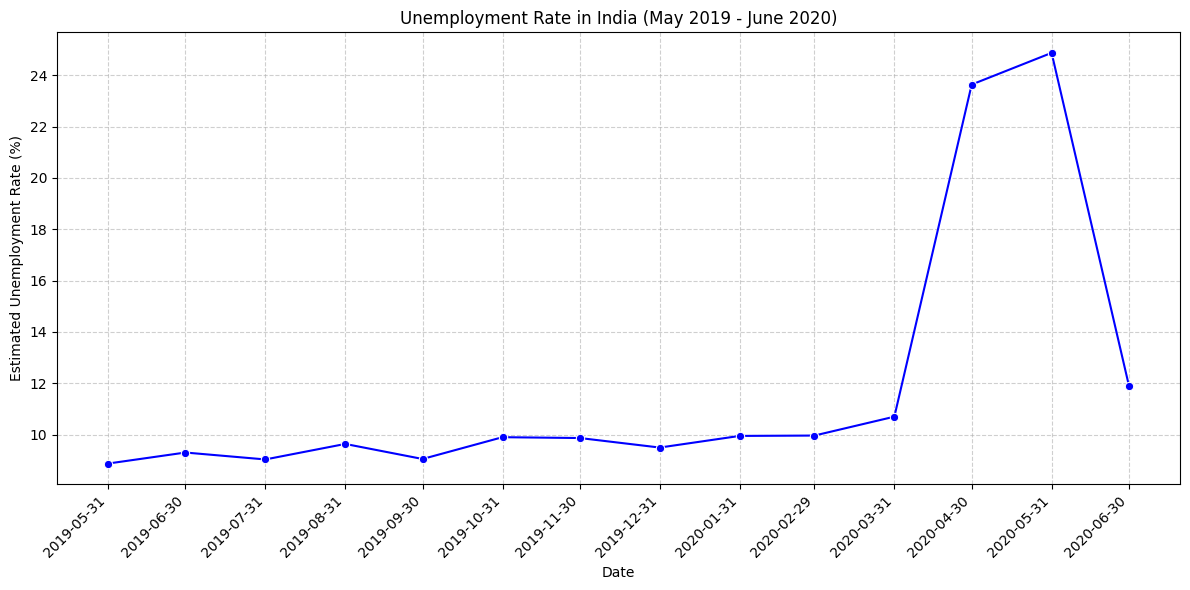

In [20]:
mask = (df['Date'] >= '2019-05-01') & (df['Date'] <= '2020-06-30')
filtered_df = df.loc[mask]
date_wise = filtered_df.groupby('Date')['Estimated Unemployment Rate (%)'].mean().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(x='Date', y='Estimated Unemployment Rate (%)', data=date_wise, marker='o', color='blue')
plt.xticks(date_wise['Date'], 
           date_wise['Date'].dt.strftime('%Y-%m-%d'), 
           rotation=45, 
           ha='right')

plt.title('Unemployment Rate in India (May 2019 - June 2020)')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**OBSERVATIONS FROM THE ABOVE LINE PLOT**


1)This line plot shows the average unemployment rate each month in India across all the states for one year (i.e May 2019 - June 2020)

2)We can observe that the unemployment way pretty much same until April 2020 (that's when the lockdown happened).

3)We can see a high rise in Unemployment rate just when the lockdown started (when April 2020 approached).

4)We can observe that there is a downfall in the Unemployment rate after May 2020.


**STATE-WISE AVERAGE UNEMPLOYMENT**



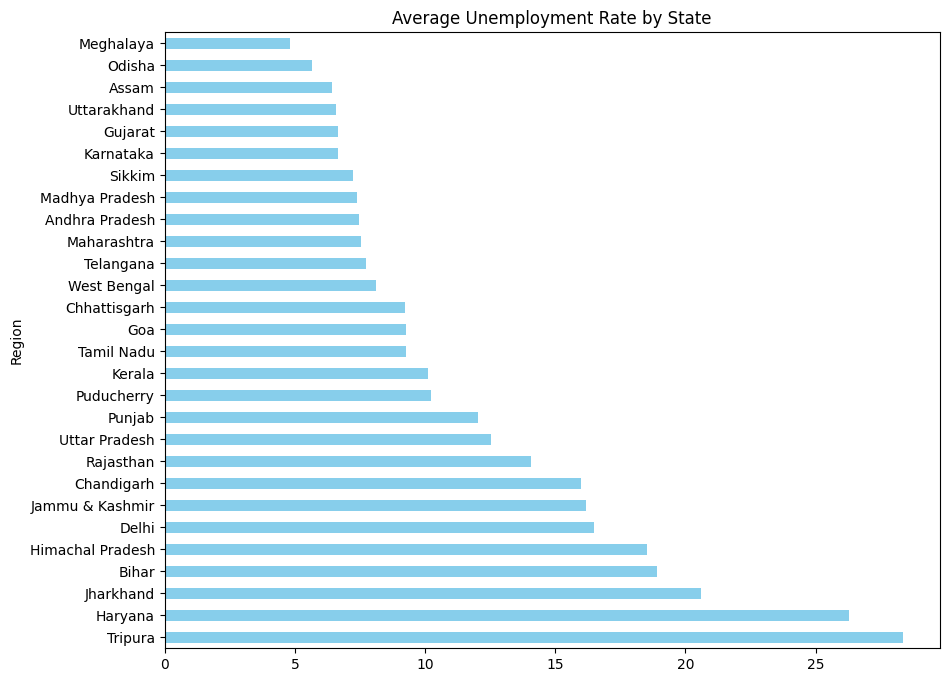

In [21]:
state_avg = df.groupby('Region')['Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,8))
state_avg.plot(kind='barh', color='skyblue')
plt.title('Average Unemployment Rate by State')
plt.show()

**OBSERVATION FROM THE ABOVE BAR GRAPH**

1)The above horizontal bar graph shows the average Unemployment rate across the states in India from lowest to highest.

2)We can say that Meghalaya has lowest unemployment rate as it is at the top of the bar graph

3)Tripura state has the highest Unemployment rate from the bar graph 

4)We can also say that the top 5 most affected states are Tripura,Haryana,Jharkhand,Bihar and Himachal Pradesh

**CORRELATION BETWEEN EMPLOYMENT METRICS**


C:\Users\maale\AppData\Local\Temp\ipykernel_2204\3839975543.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


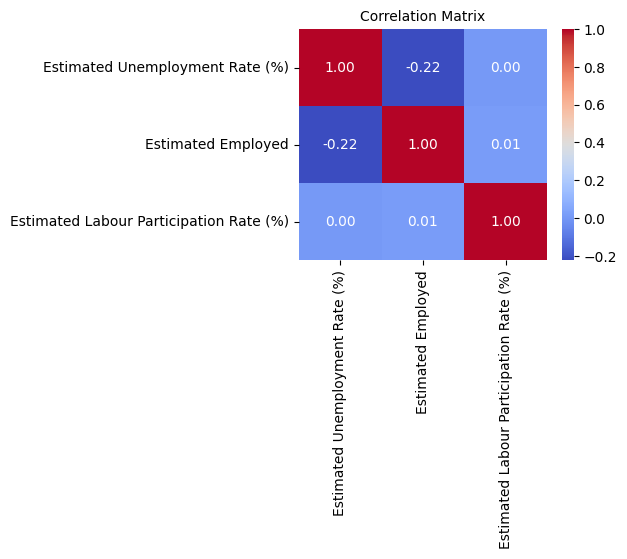

In [29]:
corr = df[['Estimated Unemployment Rate (%)', 
           'Estimated Employed', 
           'Estimated Labour Participation Rate (%)']].corr()

# Plot smaller heatmap
plt.figure(figsize=(4,3))  # smaller width x height (you can adjust)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Matrix', fontsize=10)
plt.tight_layout()
plt.show()

**OBSERVATION**

1) The above correlation matrix shows the correlation of the three variables i.e.Estimated Unemployment rate ,Estimated Employed and Estimated Labour Participation Rate.
2) The correlation between Estimated unemployment rate and Estimated Employed is -0.22 which means that as one increases the other slightly decreases but it don't follow a strong pattern.
3) The correlation between Estimated unemployment rate and Estimated Labour Participation Rate is 0.00 which means that change in one doesn't affect the other.
4) The correlation between Estimated Employed and Estimated Labour Participation Rate is 0.01 which means that they do not have any relationship either.

**RURAL VS. URBAN COMPARISON**

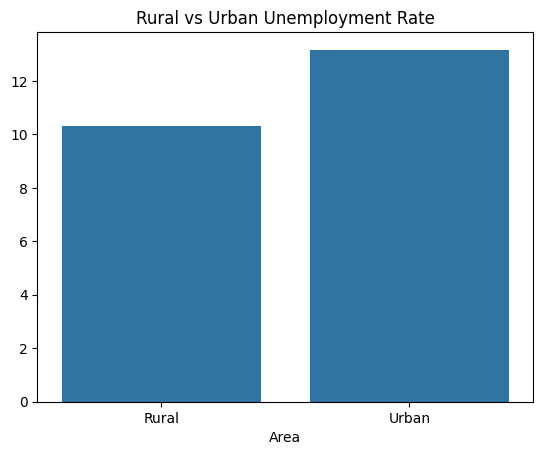

In [23]:
area_avg = df.groupby('Area')['Estimated Unemployment Rate (%)'].mean()
sns.barplot(x=area_avg.index, y=area_avg.values)
plt.title('Rural vs Urban Unemployment Rate')
plt.show()


**OBSERVATION**

1) Unemployment is lower in rural areas than in urban ones.

2)Urban areas have a higher unemployment rate than rural areas.

**PIE DIAGRAM REPRESENTING TOP 5 STATES WHICH ARE AFFECTED BY UNEMPLOYMENT THE MOST**

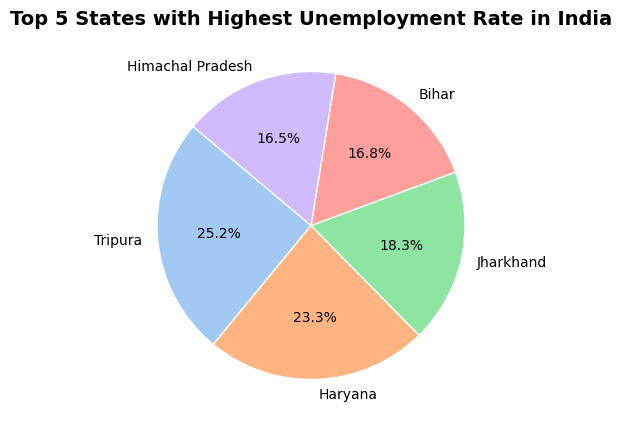

In [25]:
top5_states = state_avg.sort_values(ascending=False).head(5)

# Define pastel colors
colors = sns.color_palette("pastel")[0:5]
plt.figure(figsize=(5,5))
plt.pie(
    top5_states,
    labels=top5_states.index,
    colors=colors,
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops={'edgecolor': 'white'}
)

plt.title('Top 5 States with Highest Unemployment Rate in India', fontsize=14, fontweight='bold')
plt.show()


**OBSERVATION**

1)Tripura has the biggest problem with jobs. Its unemployment rate is the highest at 25.2%. This means about 1 out of every 4 people who want a job there can't find one.

2)Haryana and Jharkhand also have very high unemployment. Their rates are 23.3% and 18.3%, which means finding work is very difficult for many people in these states.

3)Then comes Bihar and Himachal Pradesh which have 16.8% and 16.5%  unemployment rate respectively.